# Countries
By Joe Patten
## Using SQL with Python
### Pandas + SQLite

In [6]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
#cursor.execute(q1).fetchall()
query = "select * from facts limit 5"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


### SQLite

In [7]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
#cursor.execute(q1).fetchall()
query = "select * from facts limit 5"
cursor.execute(query).fetchall()

[(1,
  'af',
  'Afghanistan',
  652230,
  652230,
  0,
  32564342,
  2.32,
  38.57,
  13.89,
  1.51),
 (2, 'al', 'Albania', 28748, 27398, 1350, 3029278, 0.3, 12.92, 6.58, 3.3),
 (3, 'ag', 'Algeria', 2381741, 2381741, 0, 39542166, 1.84, 23.67, 4.31, 0.92),
 (4, 'an', 'Andorra', 468, 468, 0, 85580, 0.12, 8.13, 6.96, 0.0),
 (5, 'ao', 'Angola', 1246700, 1246700, 0, 19625353, 2.78, 38.78, 11.49, 0.46)]

### Summaries

In [11]:
query_sum = '''
SELECT MIN(Population), MAX(Population), MIN(Population_Growth), MAX(Population_Growth) 
FROM facts;
'''
pd.read_sql_query(query_sum, conn)

,MIN(Population),MAX(Population),MIN(Population_Growth),MAX(Population_Growth)
0,0,7256490011,0.0,4.02


### Looking at anomolies

In [15]:
query_min = '''
SELECT name, population
FROM facts
WHERE population = (select min(population) from facts);
'''
pd.read_sql_query(query_min, conn)

,name,population
0,Antarctica,0


In [16]:
query_max = '''
SELECT name, population
FROM facts
WHERE population = (select max(population) from facts);
'''
pd.read_sql_query(query_max, conn)

,name,population
0,World,7256490011


## Visualizing the Data

C:\Users\josep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3291: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC9D7A86A0>,
      dtype=object)

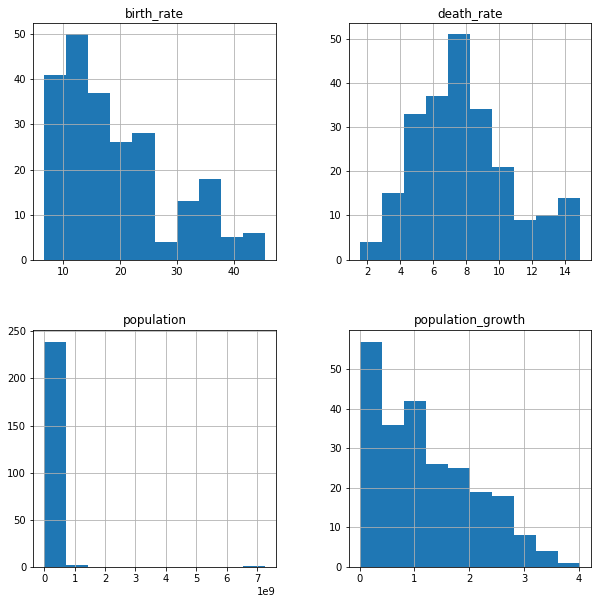

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

query_hist = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE (name IS NOT "Antartica") OR (name IS NOT "World");
'''
pd.read_sql_query(query_hist, conn).hist(ax=ax)

### Highest Population Density

In [29]:
query_high = '''
SELECT name, CAST(Population as FLOAT) / CAST(Area_Land as FLOAT) as pop_density
FROM facts
ORDER BY pop_density DESC;
'''
df = pd.read_sql_query(query_high, conn)
df.head(10)

,name,pop_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


In [42]:
query_high = '''
SELECT Name, CAST(Population as FLOAT) / CAST(Area_Land as FLOAT) as pop_density
FROM facts
WHERE Name NOT IN ("World", "Antarctica")
ORDER BY pop_density DESC;
'''
df = pd.read_sql_query(query_high, conn)
df.head(10)

,name,pop_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC9E580B00>]],
      dtype=object)

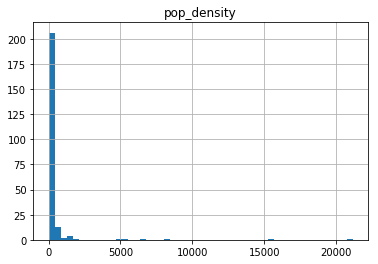

In [44]:
df.hist(bins=50)

### Highest Water to Land Ratio?

In [40]:
query_ratio = '''
SELECT Name, CAST(Area_Water as FLOAT) / CAST(Area_Land as FLOAT) as water_land_ratio
FROM facts
WHERE Name NOT IN ("World", "Antarctica")
ORDER BY water_land_ratio DESC;
'''
df = pd.read_sql_query(query_ratio, conn)
df.head(10)

,name,water_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [47]:
conn.close()